In [2]:
import wrf as w
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import pandas as pd 
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import cmaps
import os 
from zMap import set_grid, add_NamCo
from zProcess import load_NamCo_shp, mask_lake
from zIO import load_prec, load_t, load_wrflist
import salem 
import warnings
warnings.filterwarnings("ignore")

if __name__ == '__main__':
    data_dir = '/home/zzhzhao/Model/wrfout'
    testname_list = [
        'test-25-3',
        'test-25-NL',
        'test-25-NM',
        ]
    N_test = len(testname_list)

    t_diff_list = dict()
    tsk_list = dict()
    t2_list = dict()

    for testname in testname_list:
        data_path = os.path.join(data_dir, testname)
        domain = 1 
        tsk, lats, lons, time = load_t(data_path, domain, 'TSK')
        t2, lats, lons, time = load_t(data_path, domain, 'T2')
        tsk = xr.where(tsk>0, tsk, np.nan)
        t2 = xr.where(t2>0, t2, np.nan)
        # t_diff = t2 - tsk       

        mask = mask_lake(data_path, load_NamCo_shp(), testname, domain)
        # t_diff_NamCo = t_diff.where(mask) # 切出NamCo范围
        # t_diff_NamCo_mean = t_diff_NamCo.mean(dim=['west_east','south_north']).resample(Time='D').mean()

        # t_diff_list[testname] = t_diff_NamCo_mean

        t2_NamCo = t2.where(mask) # 切出NamCo范围
        t2_NamCo_mean = t2_NamCo.mean(dim=['west_east','south_north'])#.resample(Time='D').mean()
        tsk_NamCo = tsk.where(mask) # 切出NamCo范围
        tsk_NamCo_mean = tsk_NamCo.mean(dim=['west_east','south_north'])#.resample(Time='D').mean()
        t2_list[testname] = t2_NamCo_mean
        tsk_list[testname] = tsk_NamCo_mean



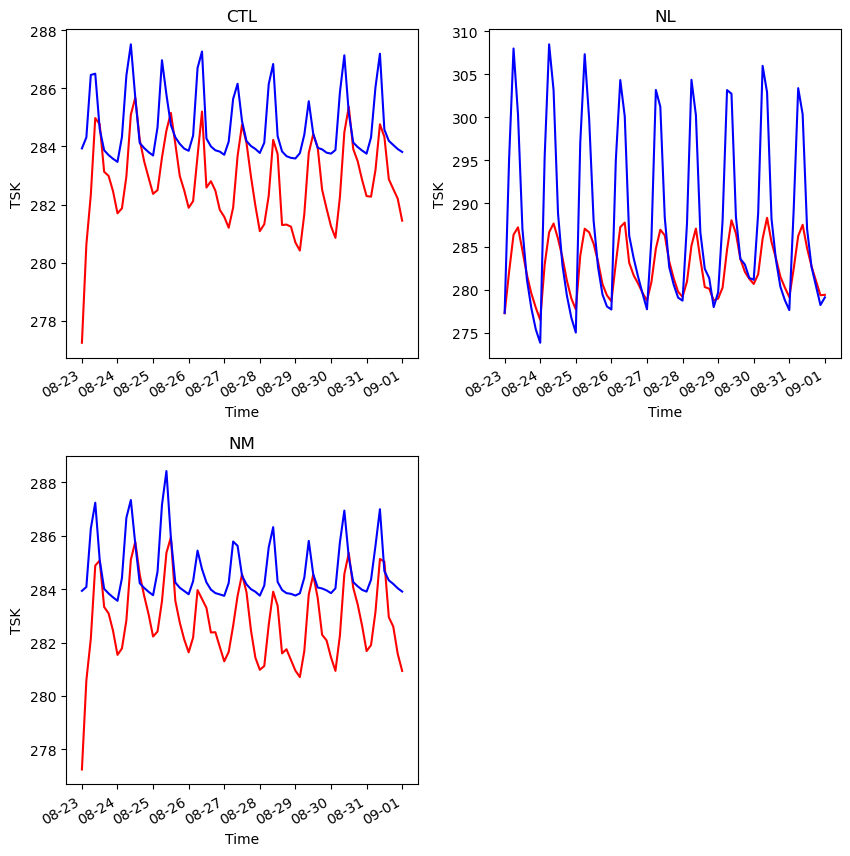

In [3]:
    labels = [
        'CTL',
        'NL', 
        'NM', 
        ]

    ylen = np.ceil(np.sqrt(N_test)).astype(int); xlen = np.ceil(N_test/ylen).astype(int)
    default_len = 5

    fig = plt.figure(figsize=(xlen*default_len, ylen*default_len), dpi=100)
    fig.subplots_adjust(hspace=0.3, wspace=0.2)
    for i, testname in enumerate(testname_list):
        ax = fig.add_subplot(ylen, xlen, i+1)

        var1 = t2_list[testname]
        var2 = tsk_list[testname]
        var1.plot.line('r', mfc='none', label='T2', ax=ax)
        var2.plot.line('b', mfc='none', label='TSK', ax=ax)
        ax.set_title(labels[i])

        import matplotlib.dates as mdate  
        ax.xaxis.set_major_formatter(mdate.DateFormatter('%m-%d'))


    